1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0736 - loss: 13.9547
Test Loss: 12.7035
Test Accuracy: 0.1117
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


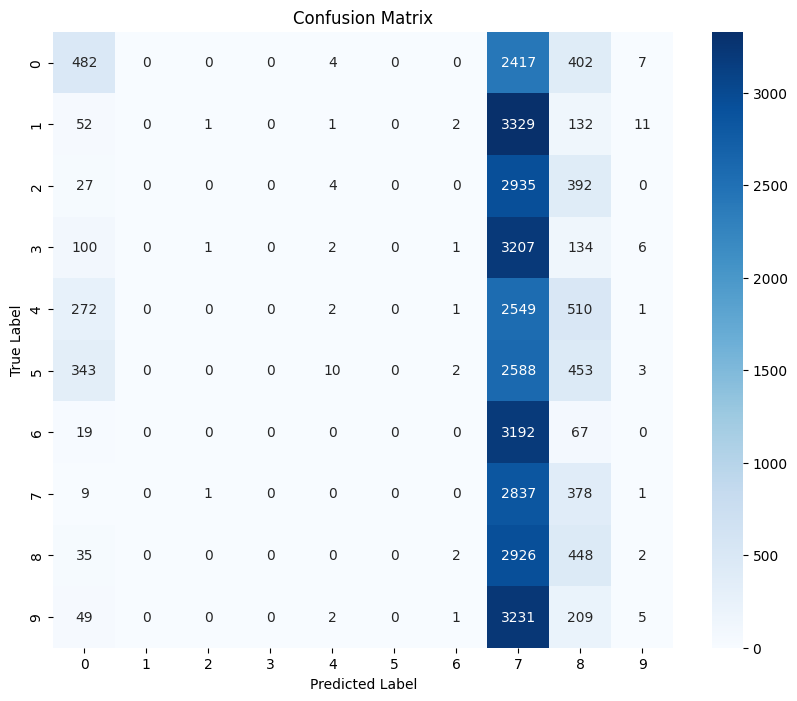

Classification Report:
               precision    recall  f1-score   support

           0     0.3473    0.1455    0.2051      3312
           1     0.0000    0.0000    0.0000      3528
           2     0.0000    0.0000    0.0000      3358
           3     0.0000    0.0000    0.0000      3451
           4     0.0800    0.0006    0.0012      3335
           5     0.0000    0.0000    0.0000      3399
           6     0.0000    0.0000    0.0000      3278
           7     0.0971    0.8794    0.1749      3226
           8     0.1434    0.1313    0.1370      3413
           9     0.1389    0.0014    0.0028      3497

    accuracy                         0.1117     33797
   macro avg     0.0807    0.1158    0.0521     33797
weighted avg     0.0800    0.1117    0.0510     33797



C:\Users\msmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\msmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\msmal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

# 🚀 データ保存先
DATA_DIR = "./data/"

# 🚀 モデルのロード
model_path = os.path.join(DATA_DIR, "cnn_lstm_model_v2.keras")  # 最新のモデルをロード
model = load_model(model_path)

# 🚀 テストデータのロード
test_features_path = os.path.join(DATA_DIR, "processed_features.npy")
test_labels_path = os.path.join(DATA_DIR, "processed_labels.npy")
X_test = np.load(test_features_path)
y_test = np.load(test_labels_path)

# 🚀 ラベルを one-hot encoding 形式に変換
if len(y_test.shape) == 1:
    y_test = to_categorical(y_test)

# 🚀 データの正規化
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 🚀 モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 🚀 予測を取得
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 🚀 Confusion Matrix の作成
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# 🚀 混同行列の可視化
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(y_test.shape[1]), yticklabels=range(y_test.shape[1]))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 🚀 Classification Report の出力（Precision, Recall, F1-score）
report = classification_report(y_true_classes, y_pred_classes, digits=4)
print("Classification Report:\n", report)